In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
import re
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

## Información principal extraída de la CNMV

Códigos identificativos y URLs de cada una de las Gestoras tipo IICs, gestoras UCITS del espacio económico europeo con sucursal, gestoras UCITS del espacio económico europeo en libre prestación, FIA del espacio económico europeo con sucursal, FIA del espacio económico europeo en libre prestación y todos sus fondos registrados en la CNMV

In [2]:
Global_df = pd.read_excel('CNMV_Global_Scrape.xlsx')
Global_df.head(10)

,Type,AM Name,AM Code,Global Data URL,Fund Name,Fund Code,Fund Global URL,Fund ID
0,IIC,"360 CORA SGIIC, S.A.",276,https://www.cnmv.es/Portal/Consultas/IIC/SGIIC...,"CODEX GLOBAL FUND, FI",5461.0,https://www.cnmv.es/Portal/Consultas/IIC/Fondo...,276-5461
1,IIC,"A&G FONDOS, SGIIC, SA",195,https://www.cnmv.es/Portal/Consultas/IIC/SGIIC...,"A&G RENTA FIJA CORTO PLAZO, FI",3989.0,https://www.cnmv.es/Portal/Consultas/IIC/Fondo...,195-3989
2,IIC,"A&G FONDOS, SGIIC, SA",195,https://www.cnmv.es/Portal/Consultas/IIC/SGIIC...,"GLOBAL MANAGERS FUNDS, FI",3072.0,https://www.cnmv.es/Portal/Consultas/IIC/Fondo...,195-3072
3,IIC,"A&G FONDOS, SGIIC, SA",195,https://www.cnmv.es/Portal/Consultas/IIC/SGIIC...,"GREDOS BOLSA EURO, FI",4881.0,https://www.cnmv.es/Portal/Consultas/IIC/Fondo...,195-4881
4,IIC,"A&G FONDOS, SGIIC, SA",195,https://www.cnmv.es/Portal/Consultas/IIC/SGIIC...,"GREDOS BOLSA INTERNACIONAL, FI",4883.0,https://www.cnmv.es/Portal/Consultas/IIC/Fondo...,195-4883
5,IIC,"A&G FONDOS, SGIIC, SA",195,https://www.cnmv.es/Portal/Consultas/IIC/SGIIC...,"GREDOS MODERADO, FI",4882.0,https://www.cnmv.es/Portal/Consultas/IIC/Fondo...,195-4882
6,IIC,"A&G FONDOS, SGIIC, SA",195,https://www.cnmv.es/Portal/Consultas/IIC/SGIIC...,"GREDOS RENTA FIJA, FI",5389.0,https://www.cnmv.es/Portal/Consultas/IIC/Fondo...,195-5389
7,IIC,"ABACO CAPITAL, SGIIC, S.A.",238,https://www.cnmv.es/Portal/Consultas/IIC/SGIIC...,ABACO GLOBAL VALUE OPPORTUNITIES FI,4827.0,https://www.cnmv.es/Portal/Consultas/IIC/Fondo...,238-4827
8,IIC,"ABACO CAPITAL, SGIIC, S.A.",238,https://www.cnmv.es/Portal/Consultas/IIC/SGIIC...,"ABACO RENTA FIJA MIXTA GLOBAL, FI",4474.0,https://www.cnmv.es/Portal/Consultas/IIC/Fondo...,238-4474
9,IIC,"ABANTE ASESORES GESTION, SGIIC, S.A.",194,https://www.cnmv.es/Portal/Consultas/IIC/SGIIC...,"ABANTE ASESORES GLOBAL, FI",2562.0,https://www.cnmv.es/Portal/Consultas/IIC/Fondo...,194-2562


Extracción de características de todos los fondos registrados en la CNMV 

In [3]:
portfolios_feat = pd.read_pickle('Info Pública/Funds DB/portfolios_features.pickle')
portfolios_feat.head(10)

,Fund ID,Fund Type,Fund Focus,Fund Risk,AUM,Fees,Rotation,Inv Policy
0,103-1081,08,07,Alto,5.265588e+07,1.50,0.70,FI RENTA VARIABLE MIXTA INTERNACIONALSe invert...
1,103-1230,08,09,Alto,1.398579e+09,1.75,0.71,FI RENTA VARIABLE INTERNACIONALEl objetivo de ...
2,103-15,NaN,NaN,NaN,2.281854e+08,7.54,NaN,El objetivo del fondo es obtener rentabilidad ...
3,103-2269,08,04,4 en una escala del 1 al 7,1.278797e+08,1.00,0.29,FI RENTA FIJA MIXTA EUROSe invertirï¿½ hasta e...
4,103-377,08,09,Alto,1.628275e+09,1.75,0.76,"FI, RENTA VARIABLE INTERNACIONAL.El objetivo d..."
5,103-4290,08,09,Alto,3.945306e+08,1.75,0.82,FI RENTA VARIABLE INTERNACIONALEl objetivo de ...
6,103-4422,08,09,Alto,1.002486e+08,1.50,0.39,FI RENTA VARIABLE INTERNACIONALAl menos el 75%...
7,103-502,08,08,Alto,1.580924e+08,1.75,1.18,"FI, RENTA VARIABLE EUROLas inversiones del fon..."
8,103-5172,08,09,6,1.232087e+07,2.55,1.78,La gestiï¿½n toma como referencia la rentabili...
9,103-5279,08,20,1,1.756381e+08,0.15,0.00,RENTA FIJA EUROEl fondo invierte el 100% de la...


Extracción de los activos que componen los portfolios de todos los fondos registrados en la CNMV 

In [4]:
portfolios = pd.read_pickle('Info Pública/Funds DB/portfolios.pickle')
portfolios.head(10)

,ISIN,Activo,Descripción,Peso Actual,Peso Anterior,Fund ID
0,ES00000128H5,RFIJA,RFIJA|SPAIN GOVERNMENT|1.30|2026-10-31,0.0006,0.0006,103-1081
1,ES0000012G34,RFIJA,RFIJA|SPAIN GOVERNMENT|1.25|2030-10-31,0.0006,0.0006,103-1081
2,ES0200002055,RFIJA,RFIJA|ADIF ALTA VELOCI|0.55|2030-04-30,0.0020,0.0019,103-1081
3,XS1645495349,RFIJA,RFIJA|CAIXABANK|2.75|2028-07-14,0.0020,0.0020,103-1081
4,ES0265936007,RFIJA,RFIJA|ABANCA CORP BANC|6.12|2029-01-18,0.0020,0.0021,103-1081
5,ES0343307015,RFIJA,RFIJA|KUTXABANK SA|0.50|2024-09-25,0.0019,0.0019,103-1081
6,ES0280907017,RFIJA,RFIJA|UNICAJA BANCO SA|2.88|2029-11-13,0.0017,0.0019,103-1081
7,XS2103013210,RFIJA,RFIJA|RED ELECTRICA FI|0.38|2028-07-24,0.0020,0.0020,103-1081
8,ES0305063010,RFIJA,RFIJA|SIDECU SA|5.00|2025-03-18,0.0021,0.0020,103-1081
9,ES0244251015,RFIJA,RFIJA|IBERCAJA |2.75|2030-07-23,0.0017,0.0018,103-1081


Caracterísrticas de los activos identificados en los portfolios

In [5]:
asset_feat = pd.read_pickle('Info Pública/Funds DB/AssetsFeatures.pickle')
asset_feat.head(10)

,ISIN,Descripción,Activo
0,ES00000128H5,RFIJA|SPAIN GOVERNMENT|1.30|2026-10-31,RFIJA
1,ES0000012G34,RFIJA|SPAIN GOVERNMENT|1.25|2030-10-31,RFIJA
2,ES0200002055,RFIJA|ADIF ALTA VELOCI|0.55|2030-04-30,RFIJA
3,XS1645495349,RFIJA|CAIXABANK|2.75|2028-07-14,RFIJA
4,ES0265936007,RFIJA|ABANCA CORP BANC|6.12|2029-01-18,RFIJA
5,ES0343307015,RFIJA|KUTXABANK SA|0.50|2024-09-25,RFIJA
6,ES0280907017,RFIJA|UNICAJA BANCO SA|2.88|2029-11-13,RFIJA
7,XS2103013210,RFIJA|RED ELECTRICA FI|0.38|2028-07-24,RFIJA
8,ES0305063010,RFIJA|SIDECU SA|5.00|2025-03-18,RFIJA
9,ES0244251015,RFIJA|IBERCAJA |2.75|2030-07-23,RFIJA


## 3 tipos de ejemplos de aplicación con la información extraída 


#### 1. Visualización de Comisión de Gestión media y Rotación media de los fondos en un Semestre de cada Gestora

#### 2. ESG: Identificar todos los fondos ESG en España mediante palabras clave y análisis de similitud de fondos

#### 3. Cuál es el valor que más se repite en los portfolios de los fondos de España?


## 1. Visualización de Comisión de Gestión media y Rotación media de los fondos en un Semestre de cada Gestora

Para distinguir 4 tipos de gestoras (por colores en los charts), se aplicará un kmeans cluster en función de los parámetros AuM, Rotación media semestral y Comisión de Gestión media.
Se excluye la gestora FINECO (número de registro oficial 132) ya que no ha reportado correctamente el valor de la rotación de la cartera.

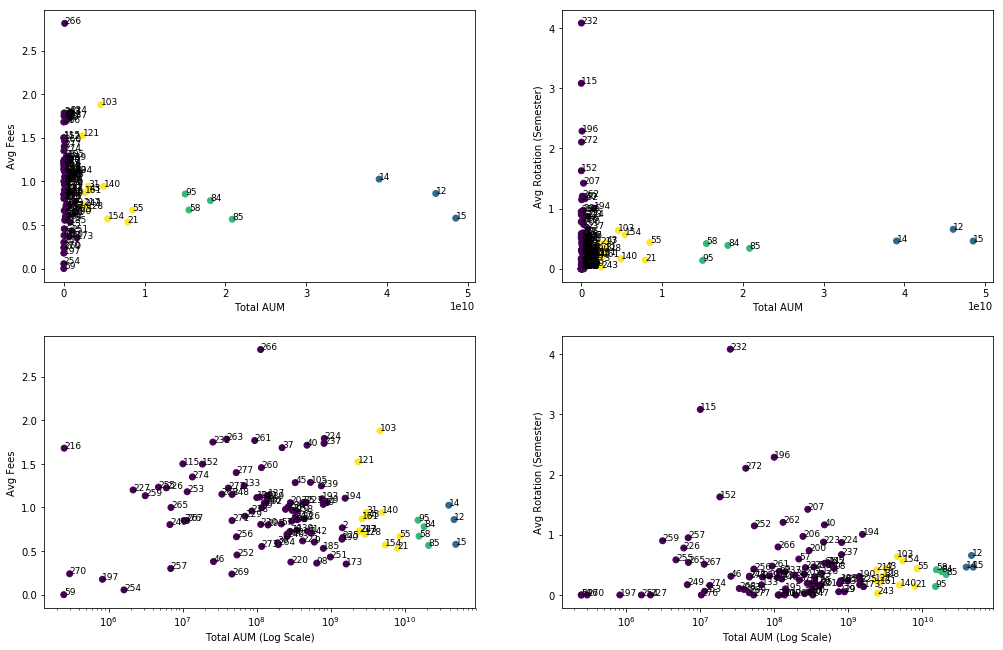

In [6]:
#AM analysis

def wavg(group, avg_name, weight_name):
    d = group[avg_name]
    w = group[weight_name]
    try:
        return (d * w).sum() / w.sum()
    except ZeroDivisionError:
        return d.mean()

df1 = pd.merge(portfolios_feat, Global_df[['Fund ID', 'AM Code', 'AM Name']], how='left', on=['Fund ID'])
df1_11 = df1[['AM Name', 'AM Code']].drop_duplicates()
df1_12 = df1.groupby(['AM Name']).sum()['AUM'].to_frame().reset_index().rename(columns={'AUM': 'Total AUM'})
df1_13 = df1.groupby(['AM Name']).apply(wavg, 'Fees', 'AUM').to_frame().reset_index().rename(columns={0: 'Avg Fees'})
df1_14 = df1.groupby(['AM Name']).apply(wavg, 'Rotation', 'AUM').to_frame().reset_index().rename(columns={0: 'Avg Rotation'})
df1 = pd.merge(pd.merge(pd.merge(df1_11, df1_12, how='left', on=['AM Name']), df1_13, how='left', on=['AM Name']), df1_14, how='left', on=['AM Name'])

kmeans = KMeans(n_clusters=4, random_state=0).fit(df1[['Total AUM', 'Avg Fees', 'Avg Rotation']].values)
df1['Cluster'] = kmeans.labels_

#Exclude Fineco - AM Code 132
df1 = df1.loc[~df1['AM Code'].isin(['132'])]

#plot
plt.figure(figsize=(17,11))

plt.subplot(2,2,1)
plt.scatter(df1['Total AUM'], df1['Avg Fees'], c=df1['Cluster'])

for i in range(len(df1)):
    plt.annotate(df1.iloc[i]['AM Code'], (df1.iloc[i]['Total AUM'], df1.iloc[i]['Avg Fees']), fontsize=9)

plt.xlabel('Total AUM')
plt.ylabel('Avg Fees')

plt.subplot(2,2,2)
plt.scatter(df1['Total AUM'], df1['Avg Rotation'], c=df1['Cluster'])

for i in range(len(df1)):
    plt.annotate(df1.iloc[i]['AM Code'], (df1.iloc[i]['Total AUM'], df1.iloc[i]['Avg Rotation']), fontsize=9)

plt.xlabel('Total AUM')
plt.ylabel('Avg Rotation (Semester)')

plt.subplot(2,2,3)
plt.scatter(df1['Total AUM'], df1['Avg Fees'], c=df1['Cluster'])

for i in range(len(df1)):
    plt.annotate(df1.iloc[i]['AM Code'], (df1.iloc[i]['Total AUM'], df1.iloc[i]['Avg Fees']), fontsize=9)

plt.xscale('log')
plt.xlabel('Total AUM (Log Scale)')
plt.ylabel('Avg Fees')

plt.subplot(2,2,4)
plt.scatter(df1['Total AUM'], df1['Avg Rotation'], c=df1['Cluster'])

for i in range(len(df1)):
    plt.annotate(df1.iloc[i]['AM Code'], (df1.iloc[i]['Total AUM'], df1.iloc[i]['Avg Rotation']), fontsize=9)

plt.xscale('log')
plt.xlabel('Total AUM (Log Scale)')
plt.ylabel('Avg Rotation (Semester)')

plt.show()

Se ordena la tabla de información para mostrar las 10 gestoras con mayor Comisión de Gestión Media 

In [7]:
df1.sort_values(by='Avg Fees', ascending=False).head(10)

,AM Name,AM Code,Total AUM,Avg Fees,Avg Rotation,Cluster
73,"VALENTUM ASSET MANAGEMENT, SGIIC, S.A.",266,1.126361e+08,2.811333,0.797360,0
0,"BESTINVER GESTION, S.A., S.G.I.I.C.",103,4.593104e+09,1.879272,0.639582,3
40,"AZVALOR ASSET MANAGEMENT, SGIIC, S.A.",224,8.145718e+08,1.792135,0.871789,0
70,"HOROS ASSET MANAGEMENT, SGIIC, S.A.",263,3.920533e+07,1.784068,0.091152,0
68,"GINVEST ASSET MANAGEMENT, SGIIC, S.A.",261,9.377024e+07,1.768000,0.480000,0
46,"AMISTRA, SGIIC, S.A.",232,2.554425e+07,1.750000,4.080000,0
48,"ANDBANK WEALTH MANAGEMENT, SGIIC, S.A.U.",237,8.081105e+08,1.735146,0.670472,0
89,"METAGESTION, S.A., SGIIC",40,4.761667e+08,1.714180,1.164282,0
88,"GESIURIS ASSET MANAGEMENT, SGIIC, S.A.",37,2.194622e+08,1.685789,0.249707,0
34,"FIDENTIIS GESTION, SGIIC, S.A.",216,2.514217e+05,1.680000,0.000000,0


Búsqueda de Gestoras o Fondos

In [8]:
Global_df.loc[Global_df['AM Code'].isin(['232'])]

,Type,AM Name,AM Code,Global Data URL,Fund Name,Fund Code,Fund Global URL,Fund ID
56,IIC,"AMISTRA, SGIIC, S.A.",232,https://www.cnmv.es/Portal/Consultas/IIC/SGIIC...,"AMISTRA GLOBAL, FI",4244.0,https://www.cnmv.es/Portal/Consultas/IIC/Fondo...,232-4244


In [9]:
portfolios_feat.loc[portfolios_feat['Fund ID'].isin(['232-4244'])]

,Fund ID,Fund Type,Fund Focus,Fund Risk,AUM,Fees,Rotation,Inv Policy
851,232-4244,08,15,4 (en una escala de 1 a 7),25544254.0,1.75,4.08,Fondo Global que busca la preservaciï¿½n del c...


## 2. ESG: Identificar todos los fondos ESG en España mediante palabras clave y análisis de similitud de fondos

Se van a buscar palabras clave como 'ESG', 'ASG', 'ISR', 'ética', 'socialmente responsable', 'sostenible', 'medioambiental' en las políticas de inversion de los fondos para identificar todos los fondos que hay en España tipo ESG

In [10]:
def insert_text_conversor_error (line):
    line = (re.sub('á', 'ï¿½', line))
    line = (re.sub('é', 'ï¿½', line))
    line = (re.sub('í', 'ï¿½', line))
    line = (re.sub('ó', 'ï¿½', line))
    line = (re.sub('ú', 'ï¿½', line))
    return line

def ClearText1 (line):
    line = (re.sub(u'''<[^>]*>|-rrb-|-lrb-|-rsb-|-lsb-|\.|,|°''', '', line))
    tokenizer = RegexpTokenizer('[a-záéíóúàèìòù0-9ñç˘uˇıńŕýĺ´gśźćńüöëïäčďěňřšťůž]+')
    line = tokenizer.tokenize(line)
    line = ' '.join(line)
    return line

def ClearText2 (line):
    line = (re.sub(u'''<[^>]*>|-rrb-|-lrb-|-rsb-|-lsb-|\.|,|°''', '', line))
    tokenizer = RegexpTokenizer('[a-záéíóúàèìòù0-9ñç˘uˇıńŕýĺ´gśźćńüöëïäčďěňřšťůž ¿½]+')
    line = tokenizer.tokenize(line)
    line = ' '.join(line)
    return line

#Find KEY words related to ESG to search the ESG funds in Spain
esg_key_words = ['ESG', 'ASG', 'ISR', 'ético', 'ética', 'éticos', 'éticas', 'socialmente responsable', 'socialmente responsables', 'sostenible', 'medioambiental', 'medioambientales']

esg_key_words = [i.lower() for i in esg_key_words]
esg_key_words2 = [insert_text_conversor_error(i) for i in esg_key_words]

list_funds = list(portfolios_feat['Fund ID'])

portfolios_esg = pd.DataFrame(columns=list(portfolios_feat.columns))
    
for i_fund in list_funds:

    i_invpol = portfolios_feat.loc[portfolios_feat['Fund ID'].isin([i_fund])]['Inv Policy'].values[0].lower()
    
    if 'ï¿½' in i_invpol:
        
        i_invpol = insert_text_conversor_error(i_invpol)
        i_invpol = ClearText2(i_invpol)
        
        is_esg = []
        for esg_word in esg_key_words2:
            if re.search(r'\b' + esg_word + r'\b', i_invpol):
                is_esg += [True]
            else:
                is_esg += [False]
        
    else:
        
        i_invpol = ClearText1(i_invpol)
        
        is_esg = []
        for esg_word in esg_key_words2:
            if re.search(r'\b' + esg_word + r'\b', i_invpol):
                is_esg += [True]
            else:
                is_esg += [False]
                
    if any(is_esg):
        portfolios_esg = portfolios_esg.append(portfolios_feat.loc[portfolios_feat['Fund ID'].isin([i_fund])], ignore_index=True)
        
portfolios_esg

,Fund ID,Fund Type,Fund Focus,Fund Risk,AUM,Fees,Rotation,Inv Policy
0,12-2787,08,04,3 en una escala del 1 al 7,5.340171e+08,0.870000,1.73,Santander Responsabilidad Solidario es un Fond...
1,12-5240,06,05,3 en una escala del 1 al 7,1.377625e+09,0.850000,0.21,Santander Sostenible 1 es un Fondo ï¿½tico de ...
2,12-5241,06,07,4 en una escala del 1 al 7,4.981707e+08,1.050000,0.13,Santander Sostenible 2 es un Fondo ï¿½tico de ...
3,12-5273,06,09,6 en una escala del 1 al 7.,2.710926e+08,1.092500,0.00,Santander Sostenible Acciones es un fondo de R...
4,12-529,06,04,3 en una escala del 1 al 7,6.826912e+07,1.250000,1.43,Inveractivo Confianza es un Fondo ï¿½tico con ...
5,12-5301,08,09,6 en una escala del 1 al 7.,1.921467e+07,0.965000,0.00,Santander Equality Acciones es un fondo de inv...
6,12-5402,08,02,3 en una escala del 1 al 7,2.486325e+08,0.400000,0.00,Santander Sostenible Bonos es un fondo de Rent...
7,12-677,08,02,2 en un plazo del 1 al 7,1.486679e+09,0.420000,1.03,El fondo seguirï¿½ criterios financieros y ext...
8,12-81,NaN,NaN,NaN,7.578910e+06,0.000000,NaN,Santander Patrimonio Diversificado es un Fondo...
9,12-87,NaN,NaN,NaN,0.000000e+00,0.000000,NaN,Fondo de Inversión Libre con vocación inversor...


Ver la similitud de los productos por la descripción de la Política de Inversión. Se va a aplicar un algoritmo (similitud de coseno) que calcule la similituud de 2 textos para generar algo similar a una matriz de correlación entre todos los fondos ESG identificados

El análisis de las palabras que contienen la Política de Inversión de todos los fondos lleva un tiempo de procesamiento aproximado de 6 horas, por lo que se cargará el archivo que se genera como output (en el anexo se especifica el código con el que se calcula)

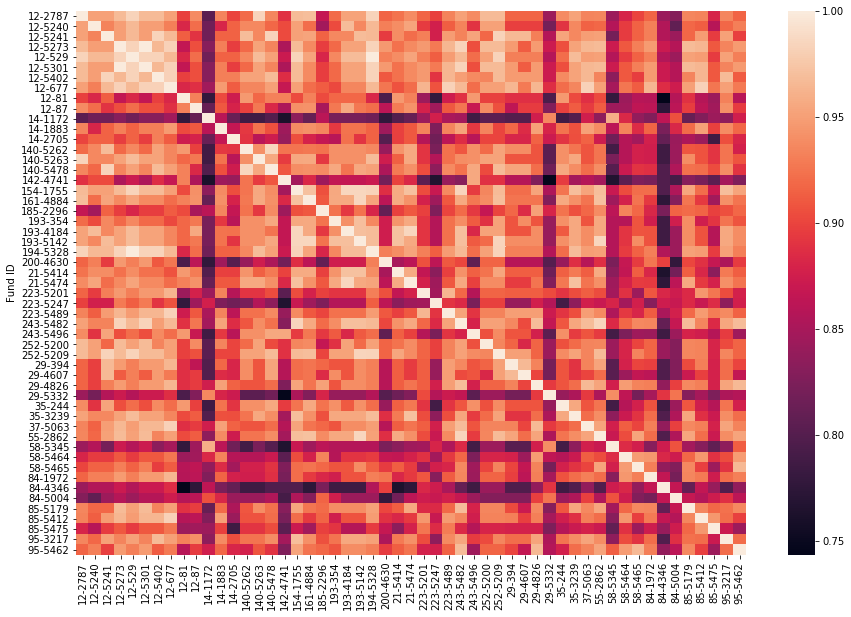

In [11]:
inv_pol_similarity_df = pd.read_pickle('Info Pública/Funds DB/policy_similarity.pickle')

#Filter the dataframe showing only the text similarity of the identified ESG funds
df_inv_pol_similarity_esg =  inv_pol_similarity_df[['Fund ID'] + list(portfolios_esg['Fund ID'])]
df_inv_pol_similarity_esg = df_inv_pol_similarity_esg.loc[df_inv_pol_similarity_esg['Fund ID'].isin(list(portfolios_esg['Fund ID']))]

#Plot
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df_inv_pol_similarity_esg.set_index(['Fund ID']), ax=ax)

Comparar la matriz de similitud de los textos de la Política de Inversión de los fondos ESG con la matriz de correlaciones de los activos que componen cada uno de los fondos ESG 

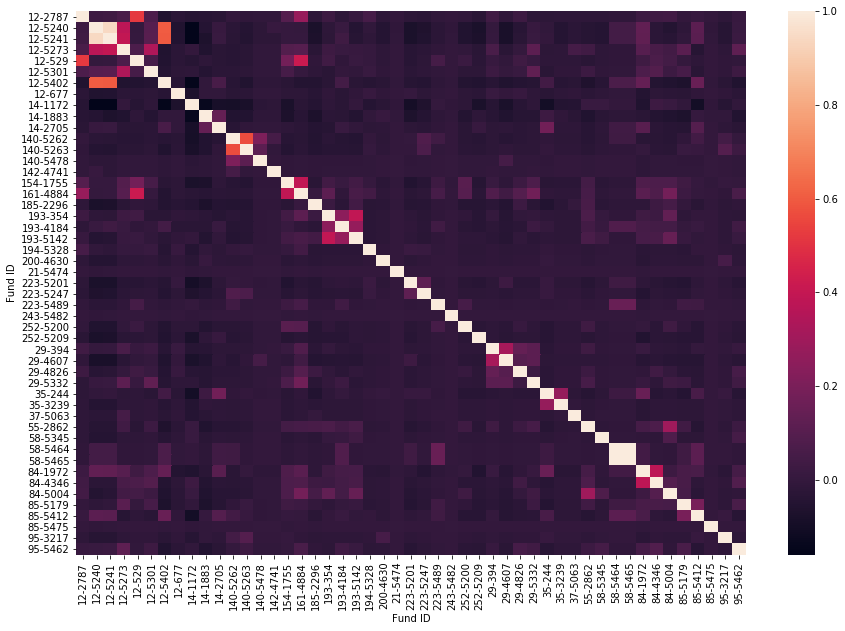

In [12]:
#Holdings Analysis

all_prts2 = portfolios.dropna().reset_index().drop(columns=['index'],axis=1) #don't consider cash positions
all_prts2['AM Code'] = [i[0] for i in all_prts2['Fund ID'].str.split('-')]
all_prts3 = all_prts2.copy(deep=True)
all_prts2 = all_prts2.loc[all_prts2['Peso Actual']!=0].reset_index().drop(columns=['index'],axis=1) #delete null positions
all_prts3['Diferencias(abs)'] = all_prts3['Peso Actual'] - all_prts3['Peso Anterior']
all_prts3 = all_prts3.loc[all_prts3['Diferencias(abs)']!=0].reset_index().drop(columns=['index'],axis=1) #delete null positions

all_holdings_matrix = all_prts2.groupby(['ISIN', 'Fund ID']).sum()['Peso Actual'].unstack().fillna(0)
all_holdings_matrix_perAM = all_prts2.groupby(['ISIN', 'AM Code']).sum()['Peso Actual'].unstack().fillna(0)

#Filter the analysis focusing on ESG funds
all_prts2_esg = all_prts2.loc[all_prts2['Fund ID'].isin(list(portfolios_esg['Fund ID']))].reset_index().drop(columns=['index'],axis=1)

all_holdings_matrix_esg = all_prts2_esg.groupby(['ISIN', 'Fund ID']).sum()['Peso Actual'].unstack().fillna(0)
all_holdings_matrix_perAM_esg = all_prts2_esg.groupby(['ISIN', 'AM Code']).sum()['Peso Actual'].unstack().fillna(0)

#Define a binary representation of stock owernship - PER FUND
holdings_binary_esg = (all_holdings_matrix_esg > 0 ).astype(int)
df_similar_corr_funds_esg = holdings_binary_esg.corr()

#Define a binary representation of stock owernship - PER AM
holdings_perAM_binary_esg = (all_holdings_matrix_perAM_esg > 0 ).astype(int)
df_similar_corr_AMs_esg = holdings_perAM_binary_esg.corr()

#Plot
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df_similar_corr_funds_esg, ax=ax)

Se agregan los porfolios correspondientes a cada Gestora y se calcula una matriz de correlaciones. Las correlaciones entre cada Gestora nos podrán indicar la "relación" basada en los productos que tienen y su similitud. En lugar de mostrar dicha matriz de correlaciones, se aplicará un algoritmo (Minimum Spanning Tree - Algoritmo de Prim) para mostrar la relación en función de las inversiones ESG que realiza cada gestora.

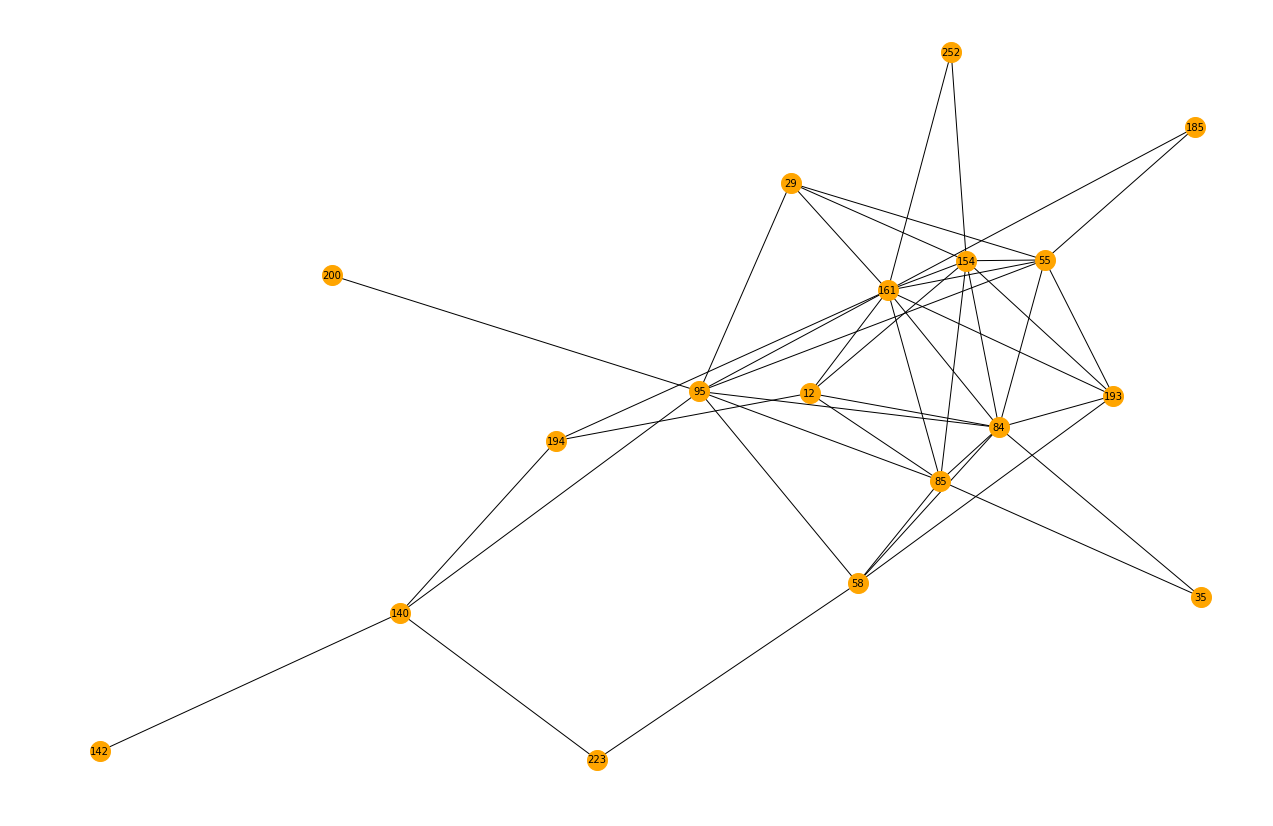

In [13]:
AMs_links_port_esg = df_similar_corr_AMs_esg.copy(deep=True)
AMs_links_port_esg.index.names = ['AM Code 2']
AMs_links_port_esg = AMs_links_port_esg.unstack().to_frame(name='Corr').reset_index()

# Keep only correlation over a threshold (correlation above 1%) and remove self correlation (cor(A,A)=1)
links_filtered = AMs_links_port_esg.loc[ (AMs_links_port_esg['Corr'] > 0.01) & (AMs_links_port_esg['AM Code'] != AMs_links_port_esg['AM Code 2']) ]
 
# Build your graph
G=nx.from_pandas_edgelist(links_filtered, 'AM Code', 'AM Code 2')
 
# Plot the network:
plt.figure(1,figsize=(17,11))
nx.draw(G, with_labels=True, node_color='orange', node_size=400, edge_color='black', linewidths=1, font_size=10)
plt.show()

## 3. Cuál es el valor que más se repite en los portfolios de los fondos de España?

Top 10 de los valores más comprados en España

In [14]:
top_assets = (all_holdings_matrix > 0).sum(axis=1).sort_values(ascending=False).to_frame(name='Count').head(10).reset_index()
top_assets = pd.merge(top_assets, asset_feat, how='left', on=['ISIN'])
top_assets = top_assets[['ISIN', 'Activo', 'Descripción', 'Count']].drop_duplicates()
top_assets

,ISIN,Activo,Descripción,Count
0,ES0148396007,ACCIONES,ACCIONES|INDITEX SA,220
1,FR0000120578,ACCIONES,ACCIONES|Sanofi - Synthelabo,191
2,ES0144580Y14,ACCIONES,ACCIONES|IBERDROLA,179
3,ES0173516115,ACCIONES,ACCIONES|REPSOL SA,167
4,FR0000120271,ACCIONES,ACCIONES|TOTAL,156
5,ES0178430E18,ACCIONES,ACCIONES|TELEFONICA,155
6,ES0113900J37,ACCIONES,ACCIONES|BANCO SANTANDER,148
7,DE0007164600,ACCIONES,ACCIONES|SAP - AG,144
8,NL0010273215,ACCIONES,ACCIONES|ASML Holding Nv,141
9,ES0109067019,ACCIONES,ACCIONES|Amadeus,135


Visualización por Gestora 

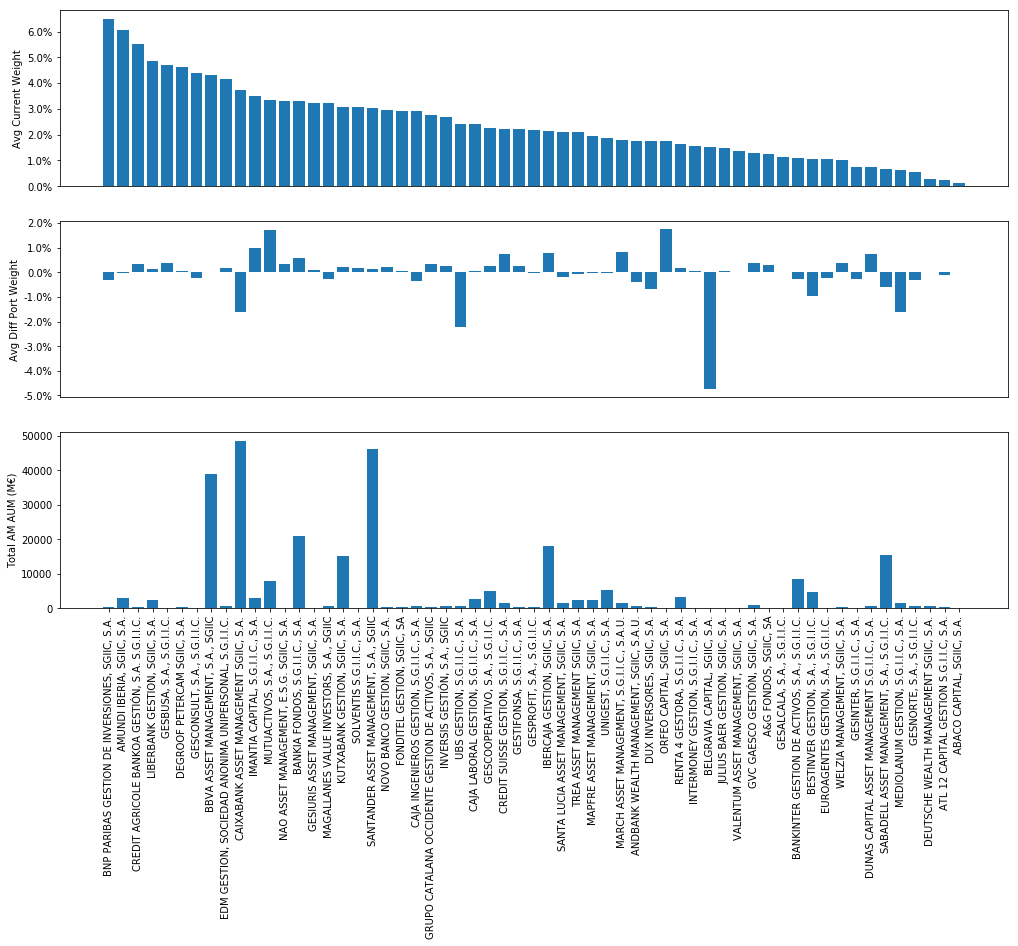

In [15]:
#Generate metrics for the searched ISIN (top holding)
deep_dive_top_assets = portfolios.loc[portfolios['ISIN'].isin(['ES0148396007'])]
deep_dive_top_assets = pd.merge(deep_dive_top_assets, Global_df[['Fund ID', 'AM Code', 'AM Name']], how='left', on=['Fund ID'])


deep_dive_top_assets_perAM = deep_dive_top_assets.groupby(['AM Name']).mean()[['Peso Actual', 'Peso Anterior']]
deep_dive_top_assets_perAM['Diferencias(abs)'] = deep_dive_top_assets_perAM['Peso Actual'] - deep_dive_top_assets_perAM['Peso Anterior']
deep_dive_top_assets_perAM = deep_dive_top_assets_perAM.sort_values(by=['Peso Actual'], ascending=False).reset_index()
deep_dive_top_assets_perAM = pd.merge(deep_dive_top_assets_perAM, df1[['AM Name', 'Total AUM']], how='left', on=['AM Name']).dropna()

import matplotlib.ticker as mtick

#plot
plt.figure(figsize=(17,11))

plt.subplot(3,1,1)
plt.bar(deep_dive_top_assets_perAM['AM Name'], np.array(deep_dive_top_assets_perAM['Peso Actual'])*100)
plt.ylabel('Avg Current Weight')
frame1 = plt.gca()
frame1.yaxis.set_major_formatter(mtick.PercentFormatter())
frame1.axes.get_xaxis().set_visible(False)

plt.subplot(3,1,2)
plt.bar(deep_dive_top_assets_perAM['AM Name'], np.array(deep_dive_top_assets_perAM['Diferencias(abs)'])*100)
plt.ylabel('Avg Diff Port Weight')
frame2 = plt.gca()
frame2.yaxis.set_major_formatter(mtick.PercentFormatter())
frame2.axes.get_xaxis().set_visible(False)

plt.subplot(3,1,3)
plt.bar(deep_dive_top_assets_perAM['AM Name'], np.array(deep_dive_top_assets_perAM['Total AUM'])/1000000)
plt.ylabel('Total AM AUM (M€)')
plt.xticks(rotation=90)

plt.show()